# Tutorial for networkx
## Bipartite Graphs

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

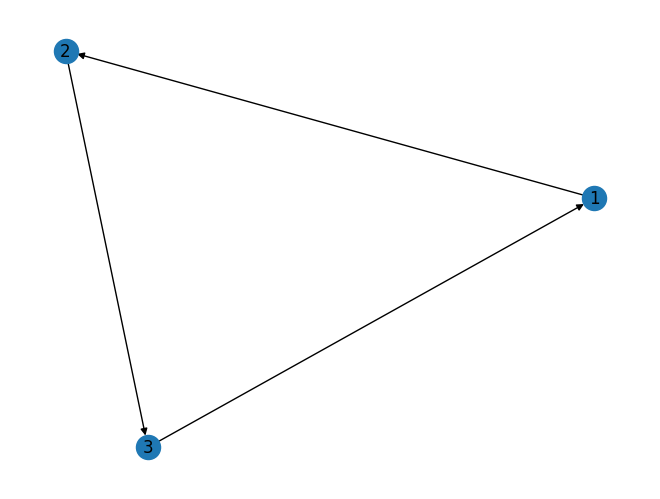

In [3]:
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
from networkx.algorithms import bipartite

B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0, color="blue")
B.add_nodes_from(["a", "b", "c"], bipartite=1, color="red")
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

nx.draw(B, with_labels=True)
plt.show()

AttributeError: module 'networkx.algorithms.bipartite' has no attribute 'Graph'

In [7]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [8]:
bottom_nodes

{1, 2, 3, 4}

In [9]:
top_nodes

{'a', 'b', 'c'}

In [10]:
nx.bipartite.maximum_matching(B)

{1: 'a', 2: 'b', 3: 'c', 'a': 1, 'b': 2, 'c': 3}

In [11]:
nx.bipartite.min_edge_cover(B)

{('a', 1),
 ('a', 4),
 ('b', 2),
 ('c', 3),
 (1, 'a'),
 (2, 'b'),
 (3, 'c'),
 (4, 'a')}

In [14]:
vertex = nx.bipartite.to_vertex_cover(
    B, matching=nx.bipartite.maximum_matching(B)
)

AttributeError: 'str' object has no attribute 'bipartite'

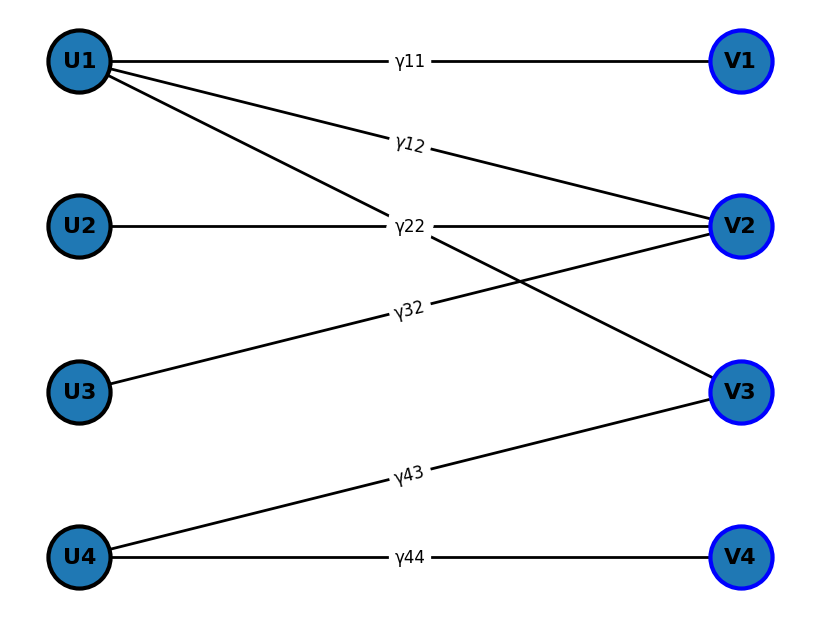

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

# グラフの作成
G = nx.Graph()

# ノードの追加
nodes_U = ["U1", "U2", "U3", "U4"]
nodes_V = ["V1", "V2", "V3", "V4"]
for node in nodes_U + nodes_V:
    G.add_node(node, bipartite=0 if node.startswith("U") else 1)

# エッジの追加（エッジの色とラベルを含む）
edges = [
    ("U1", "V1", "γ11"),
    ("U1", "V2", "γ12"),
    ("U1", "V3", "γ13"),
    ("U2", "V2", "γ22"),
    ("U3", "V2", "γ32"),
    ("U4", "V3", "γ43"),
    ("U4", "V4", "γ44"),
]

# ノードの位置指定
pos = {
    "U1": (0, 4),
    "U2": (0, 3),
    "U3": (0, 2),
    "U4": (0, 1),
    "V1": (1, 4),
    "V2": (1, 3),
    "V3": (1, 2),
    "V4": (1, 1),
}

# エッジの色設定
edge_colors = []
edge_labels = {}
for u, v, label in edges:
    G.add_edge(u, v)
    edge_labels[(u, v)] = label

# グラフの描画
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="white",
    width=2,
    font_size=16,
    font_weight="bold",
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# ノードの枠線を青と黒に分けて描画
for node in nodes_U:
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[node],
        node_size=2000,
        edgecolors="black",
        linewidths=3,
    )
for node in nodes_V:
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node], node_size=2000, edgecolors="blue", linewidths=3
    )

plt.show()

In [33]:
max_matching = nx.bipartite.maximum_matching(G)
max_matching

{'U1': 'V1', 'U2': 'V2', 'U4': 'V3', 'V1': 'U1', 'V3': 'U4', 'V2': 'U2'}

In [39]:
min_cover = nx.bipartite.to_vertex_cover(G, max_matching)
min_cover

{'U1', 'U4', 'V2'}